# vote_coefficients_0xAA40E2E5c8df03d792A52B5458959C320F86ca18_1


In [2]:
import os
from pathlib import Path
import numpy as np

import pandas as pd

from sbdata.FlipsideApi import FlipsideApi

# Set path to data folder
current_dir = Path(os.getcwd())
PATH_TO_EXPORT = os.path.join(current_dir.parent.parent, 'tx_data', 'all_beta_rounds')
DATA_DIR = os.path.join(current_dir.parent.parent, 'data-regen-rangers')
DATA_DIR_GITCOIN = os.path.join(current_dir.parent.parent, 'data-gitcoin')
CSV_GITCOIN_GRANTS = 'vote_coefficients_0x421510312C40486965767be5Ea603Aa8a5707983_2.csv'

# read the address from oss grant

api_key = os.environ['FLIPSIDE_API_KEY']
flipside_api = FlipsideApi(api_key, max_address=400)
PATH_TO_VOTES = os.path.join(DATA_DIR, "votes_baoki.csv")
PATH_TO_GRANTS = os.path.join(DATA_DIR, "all-allo-rounds.csv")
PATH_TO_PROJECTS = os.path.join(DATA_DIR, "projects_QmQurt.csv")
PATH_TO_VOTES_GITCOIN = os.path.join(DATA_DIR_GITCOIN, CSV_GITCOIN_GRANTS)

# load data
df_votes = pd.read_csv(PATH_TO_VOTES_GITCOIN)
df_grants = pd.read_csv(PATH_TO_GRANTS)
df_application = pd.read_csv(PATH_TO_PROJECTS)
# Lowercase all addresses because flipside api return lowercase address
#id,projectId,applicationId,roundId,token,voter,grantAddress,amount,amountUSD,coefficient,status,last_score_timestamp,type,success,rawScore,threshold
df_grants['Round ID'] = df_grants['Round ID'].str.lower()
str_columns_votes = ['id', 'projectId', 'roundId', 'voter', 'grantAddress']
df_votes[str_columns_votes] = df_votes[str_columns_votes].applymap(lambda x: x.lower())

str_columns_application = ['id', 'roundId', 'metadata.application.round', 'metadata.application.recipient']
df_application[str_columns_application] = df_application[str_columns_application].applymap(lambda x: str(x).lower())

# round_id = df_grants[df_grants['Round name'] == 'Web3 Community and Education']['Round ID'].values[0]
array_unique_address = df_votes['voter'].unique()

array_unique_address = np.char.lower(array_unique_address.astype(str))


In [3]:
from sbutils import LoadData

# Load data
data_loader = LoadData.LoadData(PATH_TO_EXPORT)
df_tx = data_loader.create_df_tx('ethereum', array_unique_address)

In [5]:
from sblegos.TransactionAnalyser import TransactionAnalyser as txa
tx_analyser = txa(df_tx, df_address=pd.DataFrame(np.intersect1d(df_tx.EOA.unique(), array_unique_address), columns=['address']))

In [4]:
df_merge = pd.read_csv(f'../output_gitcoin/n_{CSV_GITCOIN_GRANTS}')

In [9]:
warm_off_votes = df_merge[df_merge['grantAddress'] =='0xba74fc29832d56d78b4d973a8d605b6620a79b94']

In [14]:
tx_analyser_warm = txa(df_tx, df_address=pd.DataFrame(warm_off_votes.voter.unique(), columns=['address']))

In [18]:
tx_analyser_warm

In [30]:
warm_off_votes.voter.unique()

array(['0xf3ad97364bccc3ea0582ede58c363888f8c4ec85',
       '0x5fb38dd2fbbb70ba5a14f827b45796782b6690a7',
       '0xb29050965a5ac70ab487aa47546cdcbc97dae45d',
       '0xbcaa51da2a73405d0e3c17682e4ac575097e89fd',
       '0xcacbbfafaf78ee757aac13d9a8e0e0a3bccfd4eb',
       '0xe862e2c1ca94eacfede3c95a217c15ef0086a29d',
       '0xe3921277177e0b9acd49f90d6d02a155d6b3a894',
       '0xda6d7e9776e59d0353377e8cca9544b5b250436c',
       '0x40dc8f2a6f33c2016c84e93bd805397e496921b1',
       '0x6e882779907fe293a16d10559790d8dce478a5ae',
       '0x89fbe6875c932258b5541e2c1d3f64e597fb83c4',
       '0x0110e6917a7bc72afef832989295d5f9ff539bb1',
       '0x770db901d4c50d85cc6672bac0d2056f74898e13',
       '0xefb2bb21ea92ada56ab100b1285d37002ffcb09f',
       '0x8863517284f8b6dd2f9097f168973ea7a48413d5',
       '0xc1d22a6191357d73c30c0fc8b31fdf78cba0032f',
       '0x80d63043c7182016cc93a585b54612fa4ff2ac7a',
       '0xef066de4c6e1c246852c5d0109cbcc6856346db8',
       '0x64c1f7c3518b9e9d56d04f02dd0b5ff304e3

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
get_title()

In [42]:
def get_title(grant_address):
    df_application.loc[df_application['metadata.application.project.recipient'] == grant_address, 'metadata.application.project.title']

C:\Users\DELL Admin\AppData\Local\Temp\ipykernel_8400\1914343329.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


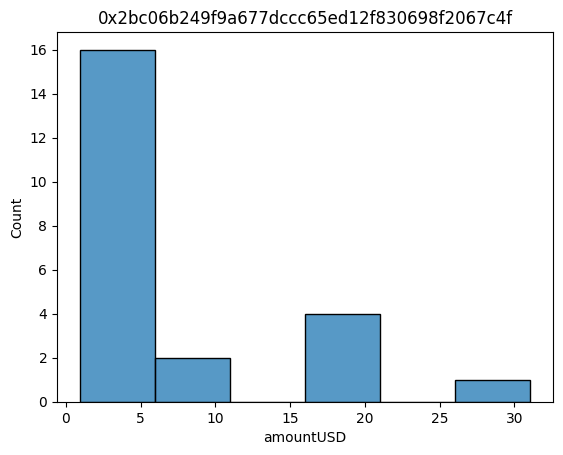

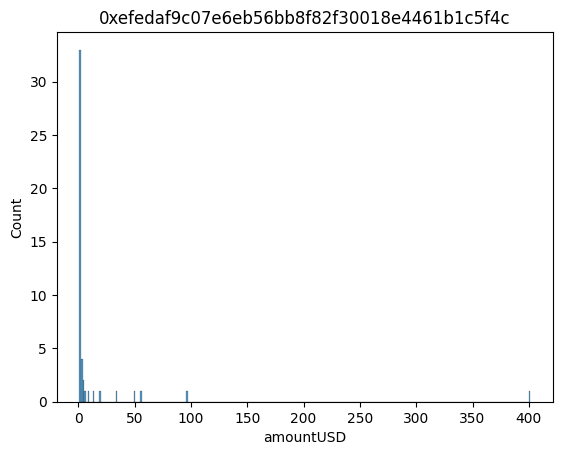

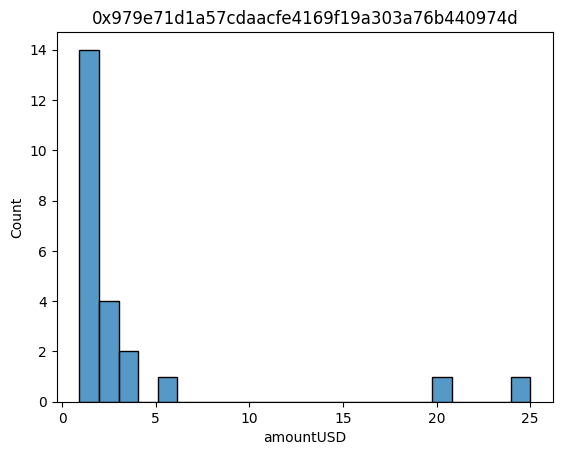

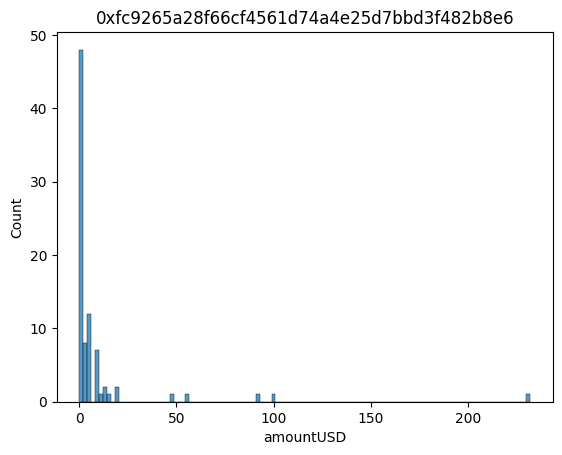

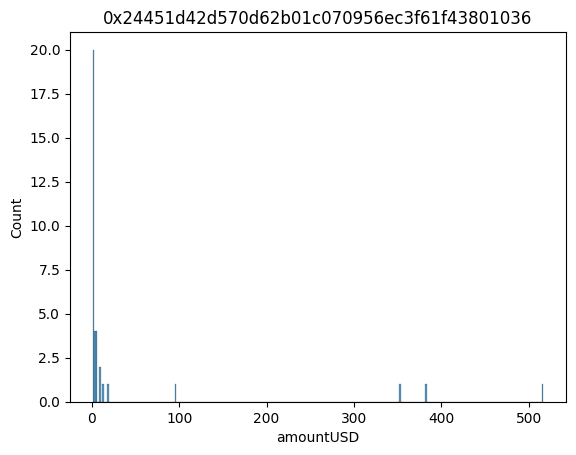

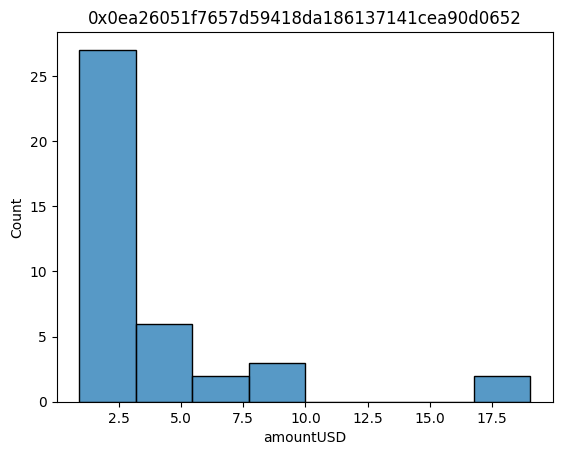

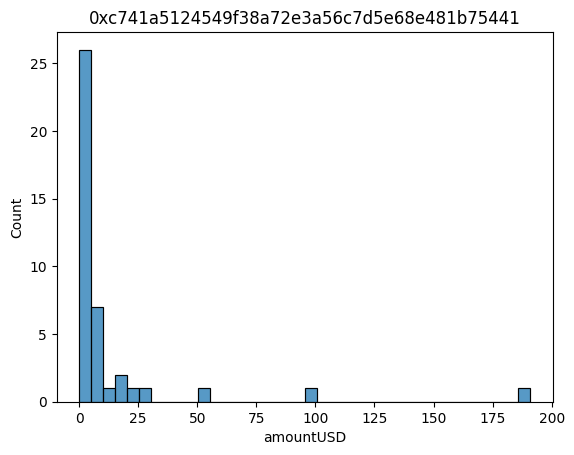

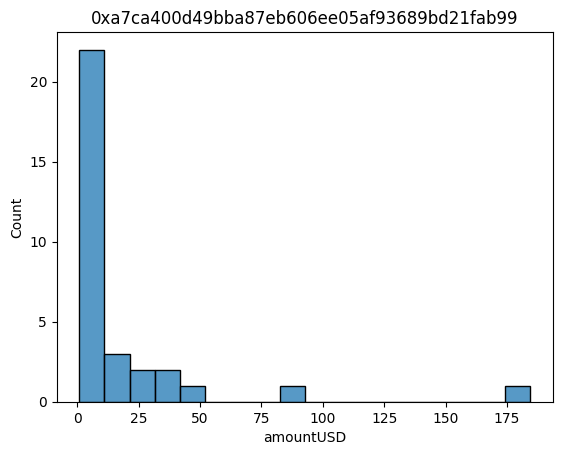

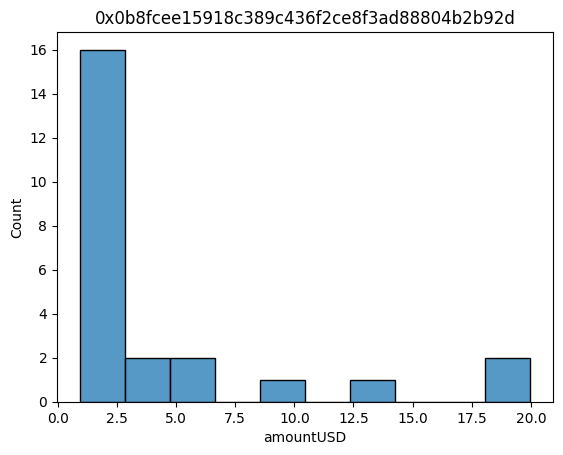

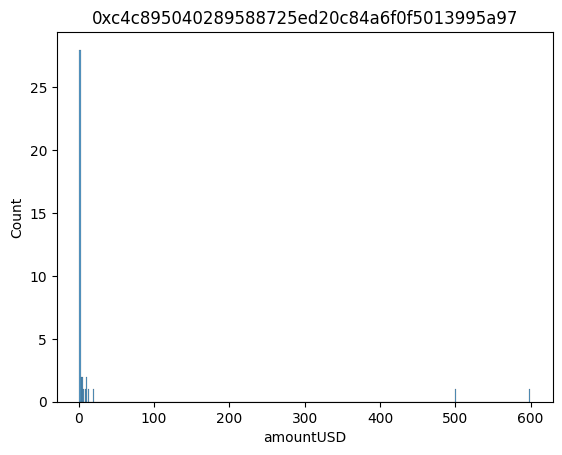

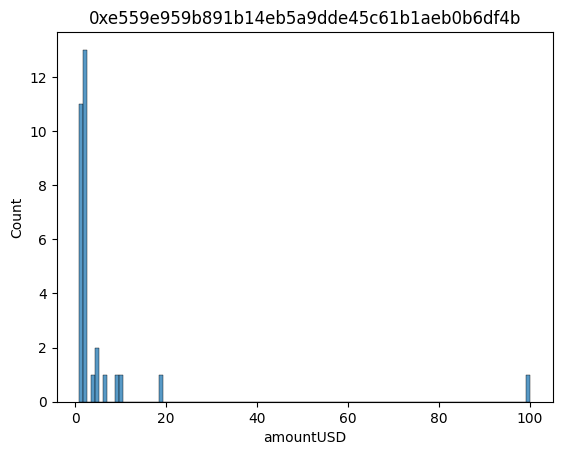

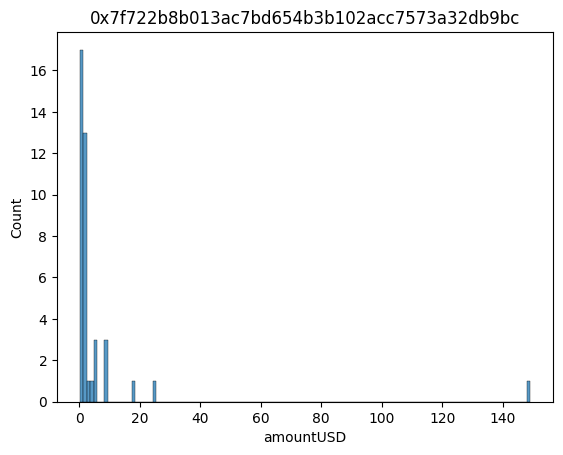

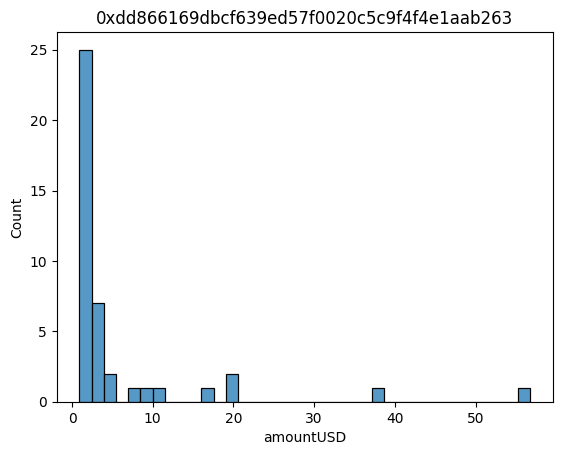

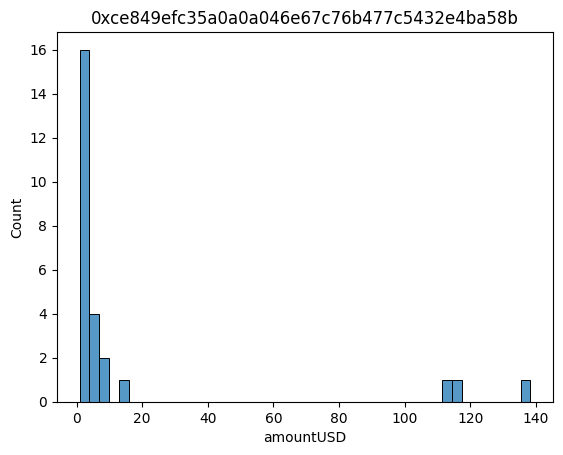

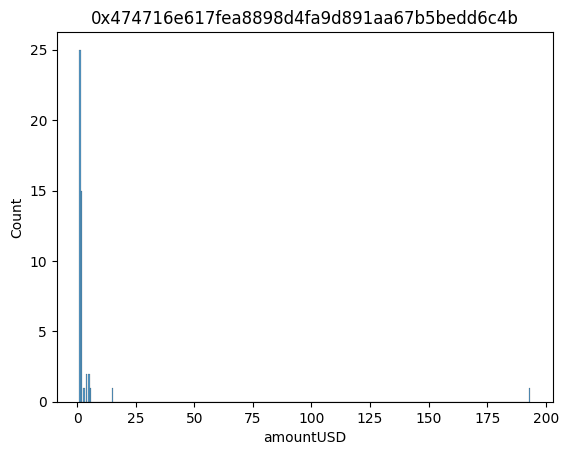

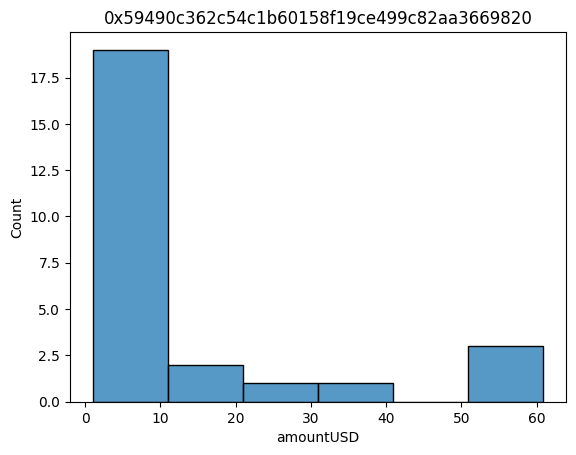

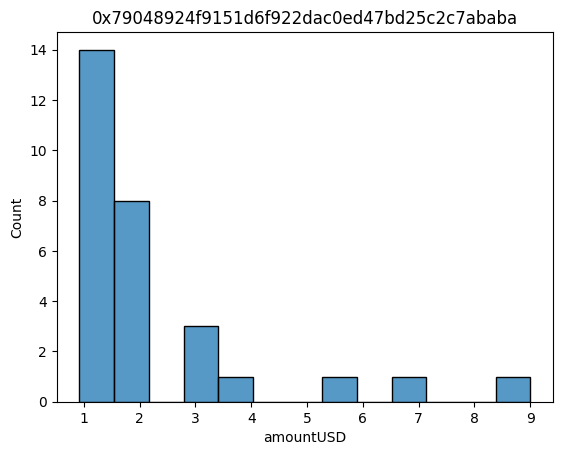

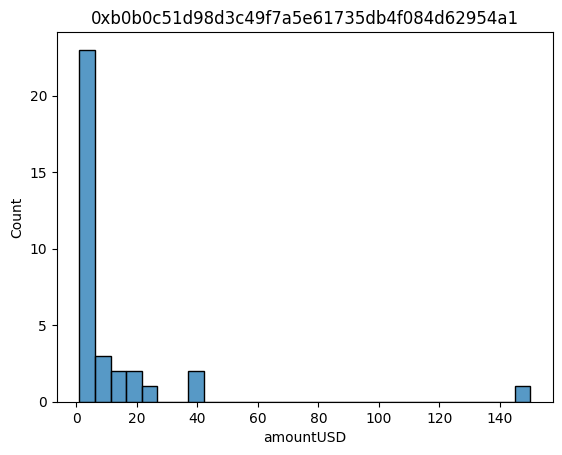

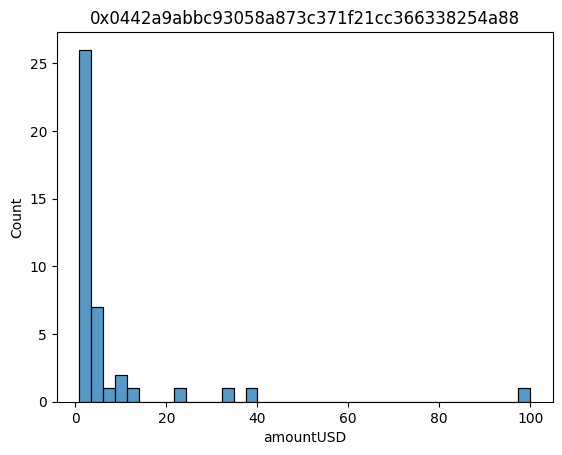

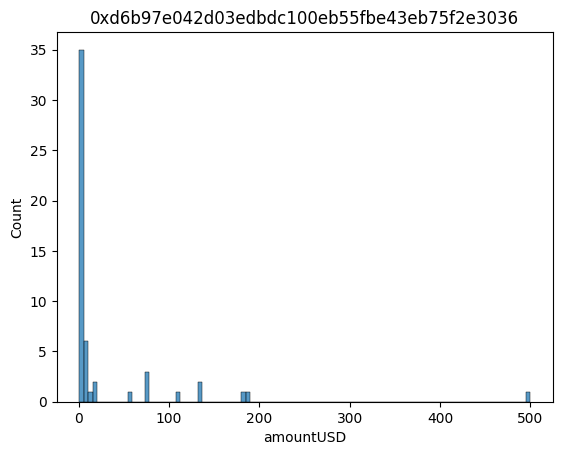

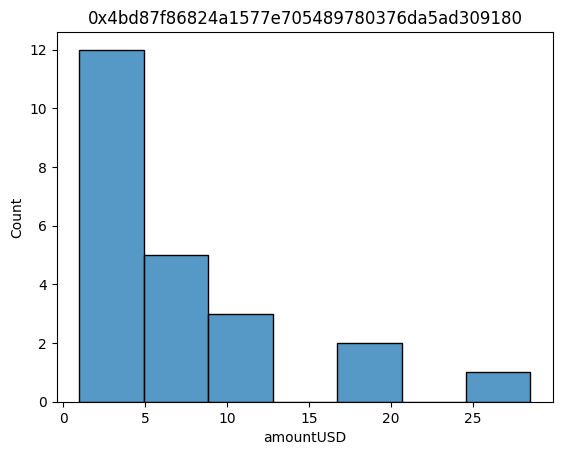

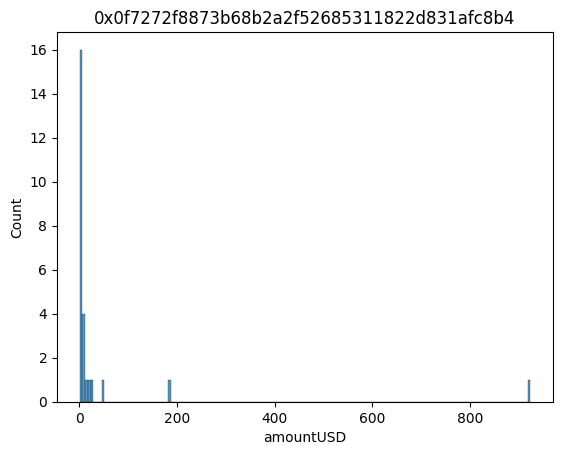

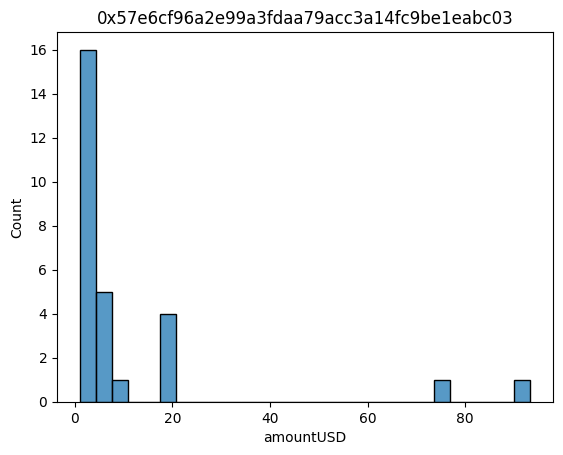

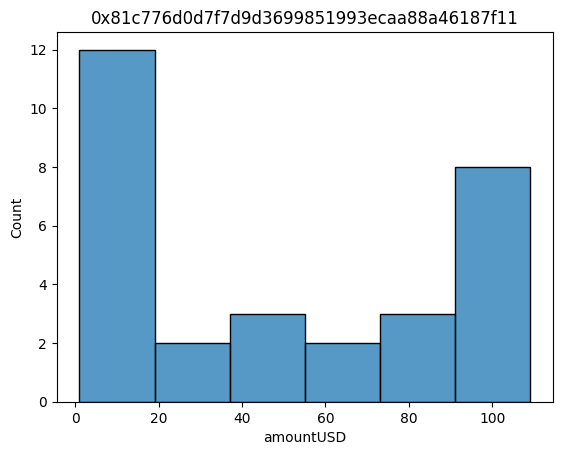

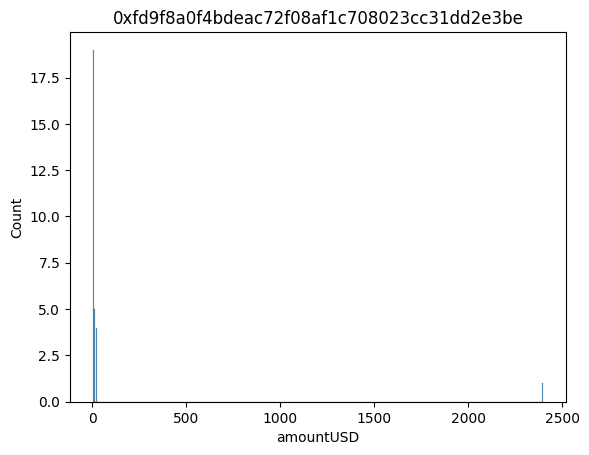

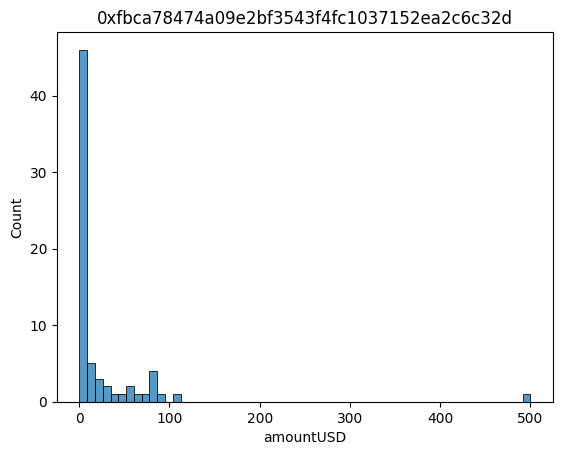

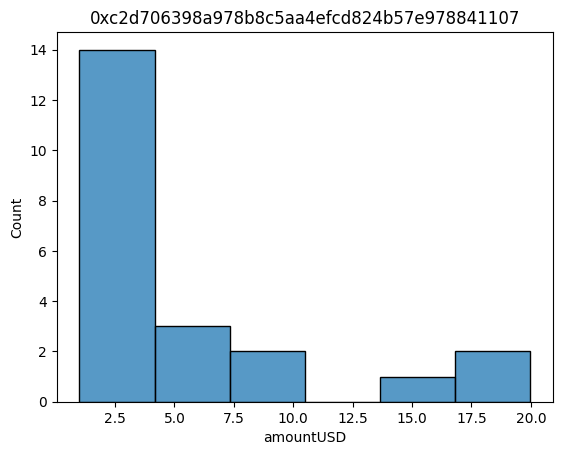

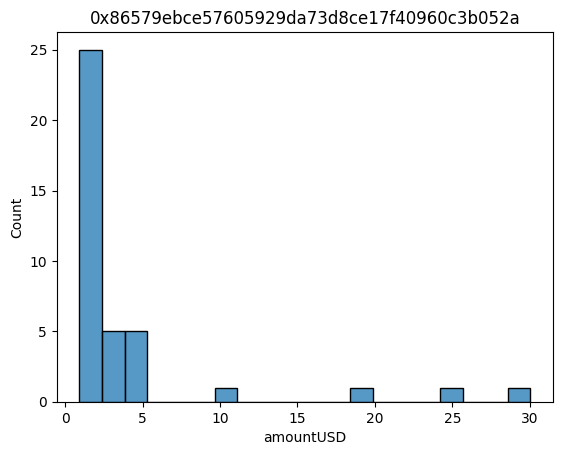

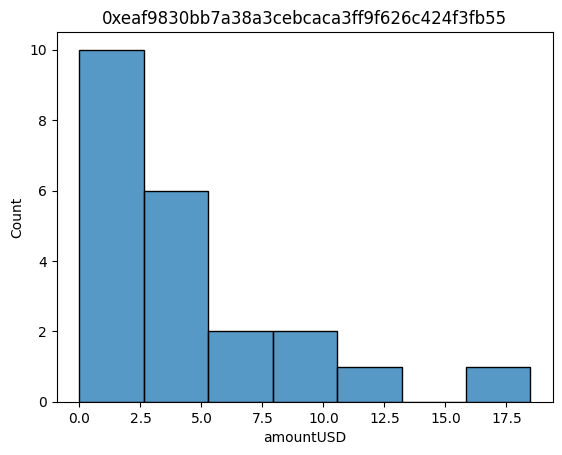

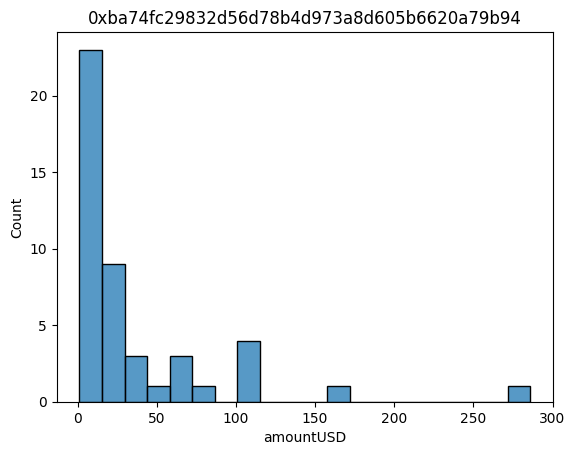

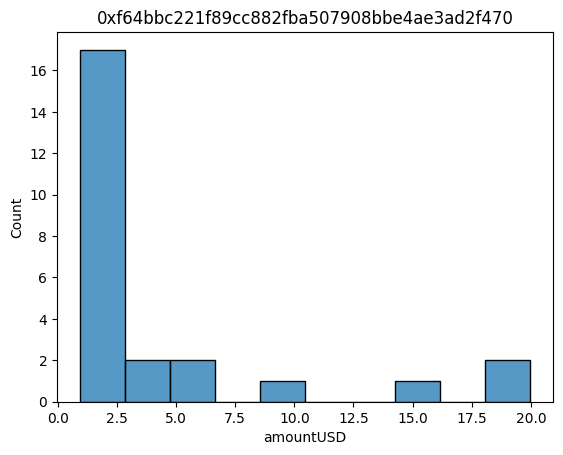

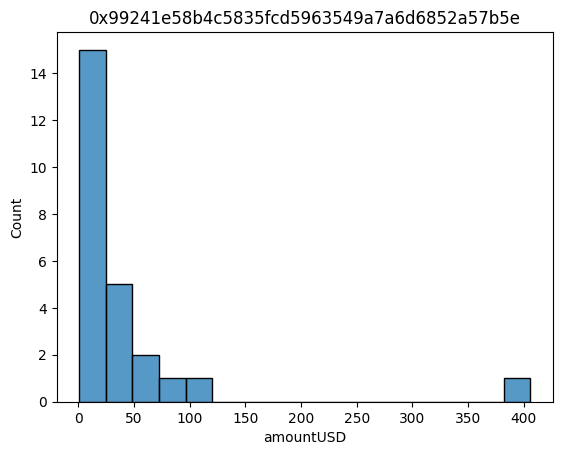

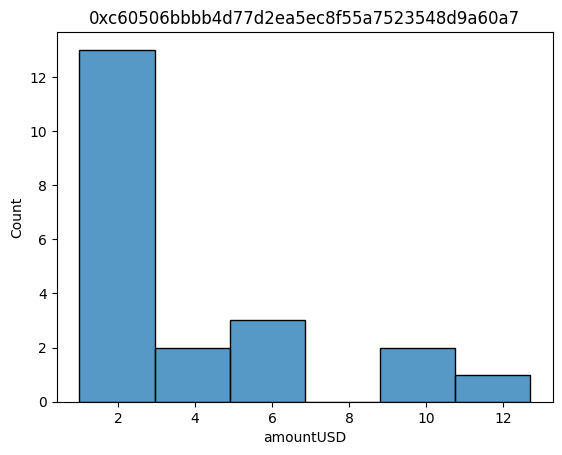

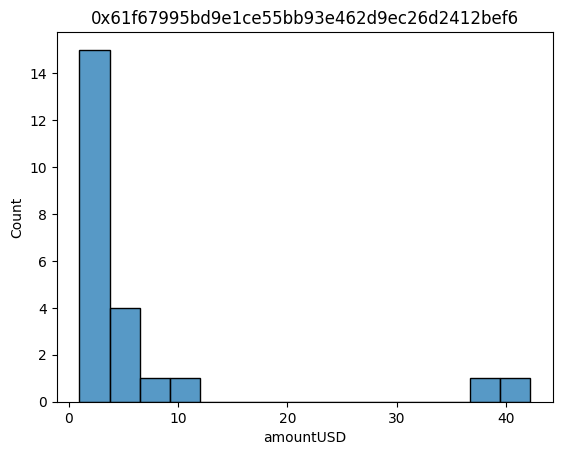

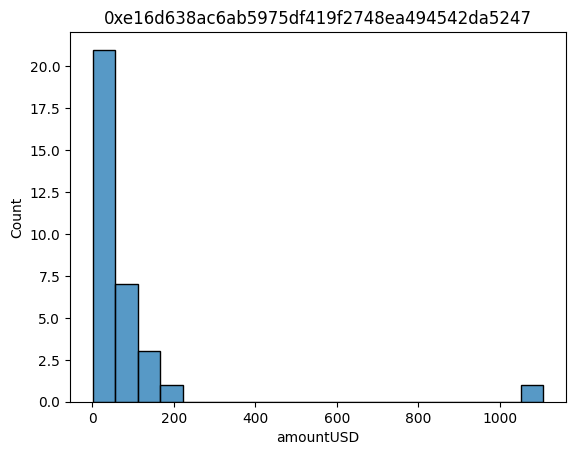

In [41]:
gb = df_merge.groupby('grantAddress')
for gr_add in df_merge.grantAddress.unique():
    group = gb.get_group(gr_add)
    # print(f'size = {group.shape[0]}')
    if len(group) > 20:
        plt.figure()
        sns.histplot(group, x='amountUSD')
        plt.title(gr_add)
        plt.suptitle()
        plt.plot()

In [27]:
gb.get_group(gr_add).amountUSD

921     2.806243
1102    2.000100
1237    4.996047
1414    2.999862
1446    3.674205
1476    1.836920
1671    1.124127
1810    1.845602
1954    1.287928
Name: amountUSD, dtype: float64